In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, mean_absolute_error

In [ ]:
df = pd.read_csv('data/chocolate_bars.csv')
df = df.loc[~df['ingredients'].isnull()]
df = pd.get_dummies(df)

# df['rate_cat'] = '3-Low'
# df.loc[(df['rating'] >= 3.00) & (df['rating'] <= 3.25), 'rate_cat'] = '2-Medium'
# df.loc[df['rating'] >= 3.5, 'rate_cat'] = '1-High'
# df.drop('rating', inplace=True, axis=1)

df['rate_cat'] = df['rating'].astype(str) + '_cat'
df.drop('rating', inplace=True, axis=1)
df.head()

In [169]:
X = df.drop(['rate_cat'], axis = 1)
y = df['rate_cat']

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = .2)

# Create a Random Forest Classifier with specified criterion
clf = RandomForestClassifier()

predictions = clf.fit(X_train, y_train).predict(X_test)

# Now create a confusion matrix 
print("Confusion Matrix \n", confusion_matrix(y_test, predictions))

# Get the Accuracy score
print("Accuracy Score: \n", accuracy_score(y_test, predictions))

# mean_absolute_error(y_test, predictions)

Confusion Matrix 
 [[  0   0   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   2   1   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0]
 [  0   0   0   0   0   3   3   8   3   4   3   0]
 [  0   0   0   0   0   0   1   3   4   5   1   0]
 [  0   0   0   0   0   6  16  32  22  41   8   2]
 [  0   0   0   0   0   3  19  63  64  95   9   3]
 [  0   1   0   0   0   5  25 113 103 130  28   3]
 [  0   0   0   0   0   0  22  65  87 149  30   6]
 [  0   0   0   0   0   3  24  70 111 185  43   7]
 [  0   0   0   0   0   1  13  38  54  89  22  10]
 [  0   0   0   0   0   0   4  16  11  42   8   9]]
Accuracy Score: 
 0.22569089048106447


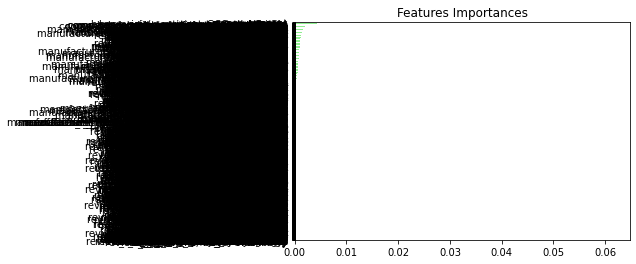

In [171]:
# Create a pd.Series of features importances
importances = pd.Series(data=clf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [ ]:
df = pd.read_csv('data/chocolate_bars.csv')

bc = pd.read_csv('data/bean_continent.csv')
df = pd.merge(df, bc, on=["bean_origin", "bean_origin"])

cc = pd.read_csv('data/company_continent.csv')
df = pd.merge(df, cc, on=["company_location", "company_location"])

df = df.loc[~df['ingredients'].isnull()]

df.year_reviewed = df.year_reviewed/max(df.year_reviewed)

df.reset_index(inplace=True)
df.set_index('index', inplace=True)
df.head()

In [ ]:
df.columns

In [ ]:
# keep = ['id', 'manufacturer', 'company_location', 'year_reviewed',
#        'bean_origin', 'bar_name', 'cocoa_percent', 'num_ingredients',
#        'ingredients', 'review', 'rating', 'bean_origin_continent',
#        'company_location_continent']

keep = ['manufacturer', 'year_reviewed','cocoa_percent',
       'ingredients', 'review', 'rating', 'bean_origin_continent',
       'company_location_continent']

df = df[keep]

ingredients = {
    'B': 'Beans',
    'S': 'Sugar',
    'S*': 'Sweetner',
    'C': 'Cocoa_Butter',
    'V': 'Vanilla',
    'L': 'Lecithin',
    'Sa': 'Salt'
}
for i in ingredients: 
    df[ingredients[i]] = 0

for idx, row in df.iterrows():
    for r in row['ingredients'].split(','):
        df.loc[idx, ingredients[r]] = 1
        
df['cocoa_percent'] = df['cocoa_percent']/100

df.drop('ingredients', axis=1, inplace=True)

df = pd.get_dummies(df)

df['rate_cat'] = df['rating'].astype(str) + '_cat'
df.drop('rating', inplace=True, axis=1)

df.head()

In [ ]:
X = df.drop(['rate_cat'], axis = 1)
y = df['rate_cat']

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = .2)

# Create a Random Forest Classifier with specified criterion
rf_class = RandomForestClassifier()

# Create the parameter grid
param_grid = {
    'n_estimators': [1100, 1200, 1300],
    'max_depth': [10, 12, 14]
    } 

# Create a GridSearchCV object
grid_rf_class = GridSearchCV(
    estimator=rf_class,
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=4,
    cv=5,
    refit=True, 
    return_train_score=True
)

predictions = grid_rf_class.fit(X_train, y_train).predict(X_test)

# Now create a confusion matrix 
print("Confusion Matrix \n", confusion_matrix(y_test, predictions))

# Get the Accuracy score
print("Accuracy Score: \n", accuracy_score(y_test, predictions))

print("Best Estimator: \n", grid_rf_class.best_estimator_)

In [ ]:
pd.crosstab(y_test, predictions, rownames=['Actual Rating'], colnames=['Predicted Rating'])


In [ ]:
# Create a pd.Series of features importances
importances = pd.Series(data=clf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()